In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=ef6236664e2ab4ed3cc51bb5fc07725a6fcc7a59901051827c68ed73268d1a15
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=677a2df6eefeabb65182a51ababd93f7ae3009410d61944046f1d656d9392186
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import multiprocessing
import sklearn
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import fancyimpute
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

In [72]:
# Read the data
df = pd.read_csv('csv_preprocessed.csv', low_memory=False)
df.describe()

,Dur,sTos,dTos,sTtl,dTtl,sHops,dHops,TotPkts,SrcPkts,DstPkts,...,Cause_Status,State_ACC,State_CON,State_ECO,State_FIN,State_INT,State_REQ,State_RST,State_URP,Attack Type
count,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,...,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06
mean,4.004418e-16,9.127304e-17,1.204505e-16,1.077321e-16,3.433961e-15,-7.359824e-17,-5.308051e-16,2.749413e-17,2.899041e-17,3.721995e-17,...,5.992416e-01,9.122504e-04,1.087009e-01,2.370782e-02,4.868160e-02,2.704111e-01,4.846098e-01,6.224525e-02,6.465544e-04,3.345480e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,4.900524e-01,3.018972e-02,3.112637e-01,1.521374e-01,2.152016e-01,4.441724e-01,4.997633e-01,2.416006e-01,2.541922e-02,3.260681e+00
min,-8.070846e-01,-6.904596e-02,-9.473906e-02,-8.127508e-01,-2.027293e+00,-6.332522e-01,-9.730588e-01,-1.670113e-01,-2.010034e-01,-1.158561e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-8.070846e-01,-6.904596e-02,-9.473906e-02,-3.299762e-01,-7.320131e-03,-3.526917e-01,-9.730588e-01,-1.670113e-01,-1.466962e-01,-1.158561e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-8.070846e-01,-6.904596e-02,-9.473906e-02,-3.299762e-01,-7.320131e-03,-3.526917e-01,-1.939318e-13,-1.267248e-01,-1.466962e-01,-1.158561e-01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.185632e-01,-6.904596e-02,-1.773502e-16,-3.299762e-01,1.190749e-13,-3.526917e-01,-1.939318e-13,-1.267248e-01,-9.238911e-02,-1.158561e-01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
max,1.097086e+01,1.782382e+01,1.847537e+01,3.103087e+00,1.428212e+01,7.222442e+00,2.128461e+01,1.608177e+02,5.334583e+01,2.526345e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [73]:
print(df.shape)

(1215675, 63)


In [74]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Attack Type'], df['Attack Type'],
                                                    stratify=df['Attack Type'],
                                                    test_size=0.15)

In [75]:
# Stratified random sampling
n_splits = 1  # You can adjust this based on your requirement
stratified_splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.15, random_state=42)
for train_index, test_index in stratified_splitter.split(df.loc[:, df.columns != 'Attack Type'], df['Attack Type']):
    X_train_strat, X_test_strat = df.iloc[train_index], df.iloc[test_index]
    y_train_strat, y_test_strat = df['Attack Type'].iloc[train_index], df['Attack Type'].iloc[test_index]

In [76]:
# Print the sizes of the datasets
print("Stratified Training dataset size:", X_train_strat.shape)
print("Stratified Testing dataset size:", X_test_strat.shape)
print("Stratified Training target size:", y_train_strat.shape)
print("Stratified Testing target size:", y_test_strat.shape)

Stratified Training dataset size: (1033323, 63)
Stratified Testing dataset size: (182352, 63)
Stratified Training target size: (1033323,)
Stratified Testing target size: (182352,)


In [77]:
# Feature selection
def mutual_info(X, Y):
    mutual_info_arr = mutual_info_classif(X, Y)
    series_info = pd.Series(mutual_info_arr)
    series_info.index = X.columns
    series_top = series_info.sort_values(ascending=False)[:20]
    return series_top

In [78]:
result = mutual_info(X_train, y_train)
train_df = X_train[result.keys()]
test_df = X_test[result.keys()]

In [79]:
# PCA
def get_pca_df(scaled_data, no_of_components, pca_model):
    Principal_components = pca.transform(scaled_data)
    column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
    pca_df = pd.DataFrame(data=Principal_components, columns=column_names)
    return pca_df

In [80]:
def get_pca_model(train_data, no_of_components):
    pca = PCA(n_components=no_of_components)
    pca_model = pca.fit(train_data)
    return pca_model

In [81]:
pca = get_pca_model(train_df, 15)
train_df = get_pca_df(train_df, 15, pca)
test_df = get_pca_df(test_df, 15, pca)

In [82]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=5, criterion="gini", random_state=21)
rfc.fit(train_df.values, y_train.values)
y_pred = rfc.predict(test_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


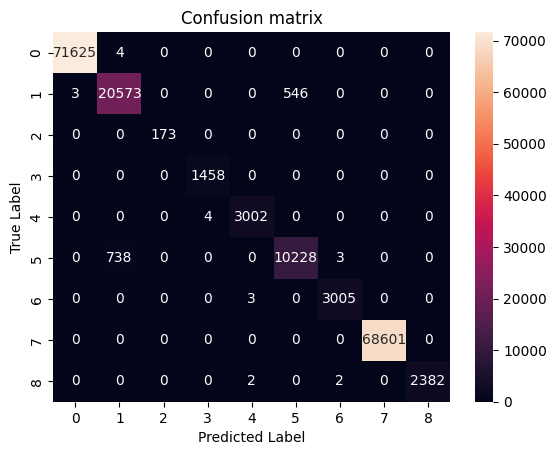

In [83]:
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [84]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9928435114503816


In [85]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

Precision: 0.9928262498818363


In [86]:
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

Recall: 0.9928435114503816


In [87]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9928279790107102
